In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 

In [156]:
data=pd.read_csv('homeprices_multilinear.csv ')
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [158]:
data.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [160]:
median=data.bedrooms.median()#fill with bedroom median
data['bedrooms']=data['bedrooms'].fillna(median)

In [162]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


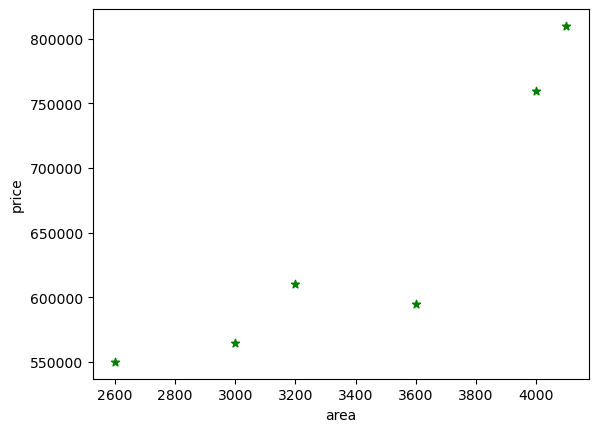

In [164]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(data.area,data.price,marker='*',color='Green')

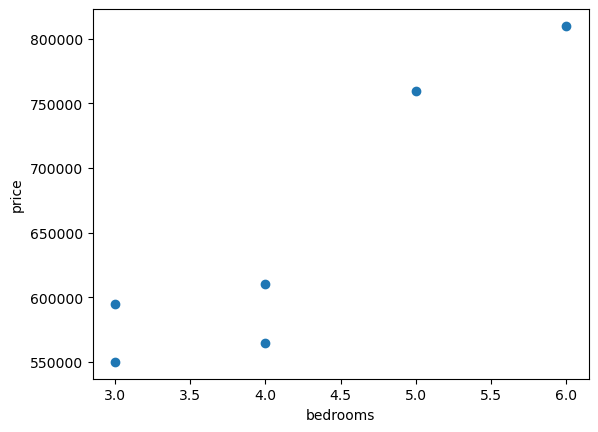

In [166]:
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.scatter(data.bedrooms,data.price)

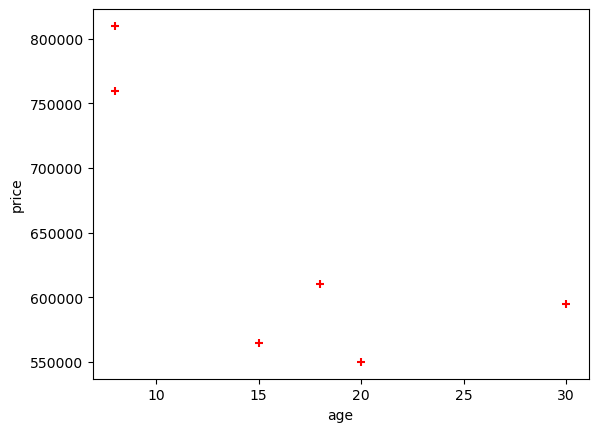

In [168]:
plt.xlabel('age')
plt.ylabel('price')
plt.scatter(data.age,data.price,marker='+',color='red')

In [170]:
x=data.drop('price',axis=1)
y=data.price

In [172]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [174]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [176]:
our_model=LinearRegression()
our_model.fit(x,y)

LinearRegression()

In [178]:
our_model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [180]:
our_model.intercept_

221323.0018654043

In [182]:
our_model.predict([[4000,3,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

In [184]:
y_pred=our_model.predict(x)

In [186]:
y_pred

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [188]:
pd.DataFrame({'true y values':y,'predicated y values':y_pred})

,true y values,predicated y values
0,550000,518217.632976
1,565000,602590.079374
2,610000,615307.414037
3,595000,597962.895832
4,760000,760663.426755
5,810000,795258.551027


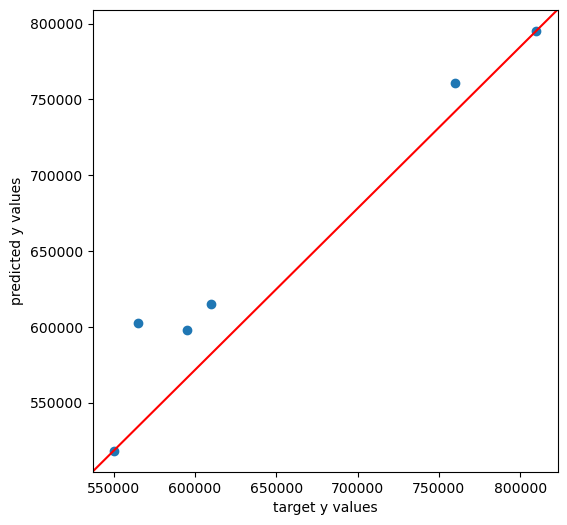

In [190]:
f,ax=plt.subplots(figsize=(6,6))
ax.scatter(y,y_pred)

plt.xlabel('target y values')
plt.ylabel('predicted y values')
ax.plot([0,1],[0,1],transform=ax.transAxes,c='red')#45 degreeline

In [192]:
import seaborn  as sns

In [194]:
correlation=data.corr()

In [196]:
correlation

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


<Axes: >

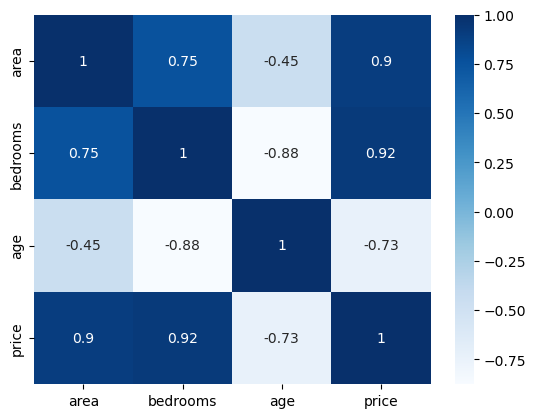

In [198]:
sns.heatmap(correlation,annot=True,cmap='Blues')

In [200]:
our_model.score(x,y)

0.9550196399325819

In [202]:
from sklearn.metrics import mean_squared_error

In [204]:
 mean_squared_error(y,y_pred)

446305128.2244931

In [220]:
import pickle
with open('hiringpickle','wb') as m:
 pickle.dump(our_model,m)

In [222]:
with open('hiringpickle','rb') as n:
    loaded_hiring=pickle.load(n)

In [231]:
loaded_hiring.predict([[4000,3,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

In [237]:
import joblib
joblib.dump(our_model,'hiringmodel')
joblibloaded_hiring=joblib.load('hiringmodel')

In [239]:
joblibloaded_hiring.predict([[4000,3,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

In [208]:
#example

In [56]:
data=pd.read_csv('hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [58]:
data.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [60]:
data.experience=data.experience.fillna('zero')

In [62]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [64]:
score_mean=data['test_score(out of 10)'].mean()
score_mean

7.857142857142857

In [66]:
import math
score_mean=math.floor(score_mean)
score_mean

7

In [68]:
data['test_score(out of 10)']=data['test_score(out of 10)'].fillna(score_mean)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [70]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5589 sha256=dfcadf29ac60facc3785af77941d315adb1bfc4a1be7bbbb4f12b1cdc9cf965b
  Stored in directory: c:\users\albin\appdata\local\pip\cache\wheels\5b\79\fb\d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [72]:
from word2number import w2n

In [74]:
data.experience=data.experience.apply(w2n.word_to_num)

In [76]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


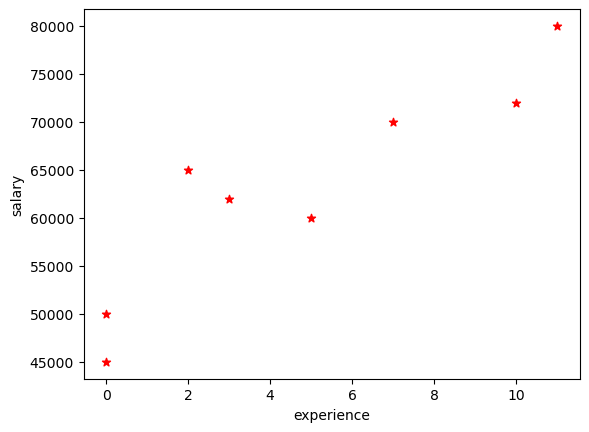

In [82]:
plt.xlabel('experience')
plt.ylabel('salary')
plt.scatter(data.experience,data['salary($)'],color='red',marker='*')

In [84]:
x=data.drop('salary($)',axis=1)
y=data['salary($)']


In [86]:
x


,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [88]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [96]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [98]:
model.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [100]:
model.intercept_

14992.651446693126

In [104]:
y_pred=model.predict(x)

In [107]:
y_pred

array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

In [109]:
model.score(x,y)

0.9770139014273139

Text(0, 0.5, 'pred y values')

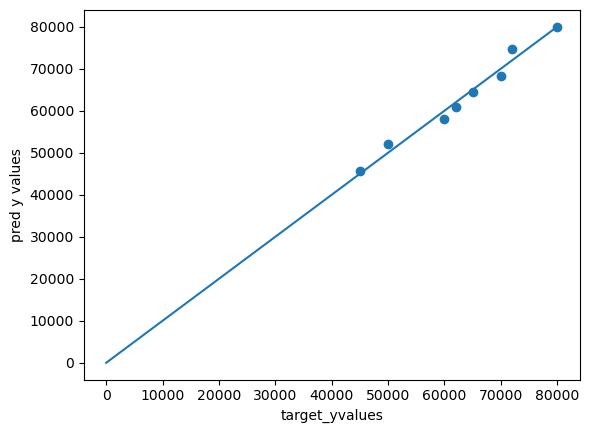

In [113]:
plt.scatter(y,y_pred)
plt.plot((0,80000),(0,80000))
plt.xlabel('target_yvalues')
plt.ylabel('pred y values')

In [115]:
pd.DataFrame({'true y values':y,'predicated y values':y_pred})

,true y values,predicated y values
0,50000,52090.467341
1,45000,45648.019642
2,60000,57964.229084
3,65000,64525.106136
4,70000,68325.211846
5,62000,60783.447853
6,72000,74796.883259
7,80000,79866.634840


In [117]:
import seaborn  as sns

In [119]:
correlation=data.corr()

In [121]:
correlation

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.352557,-0.290480,0.908017
test_score(out of 10),-0.352557,1.000000,0.186655,-0.077524
interview_score(out of 10),-0.290480,0.186655,1.000000,0.037820
salary($),0.908017,-0.077524,0.037820,1.000000


<Axes: >

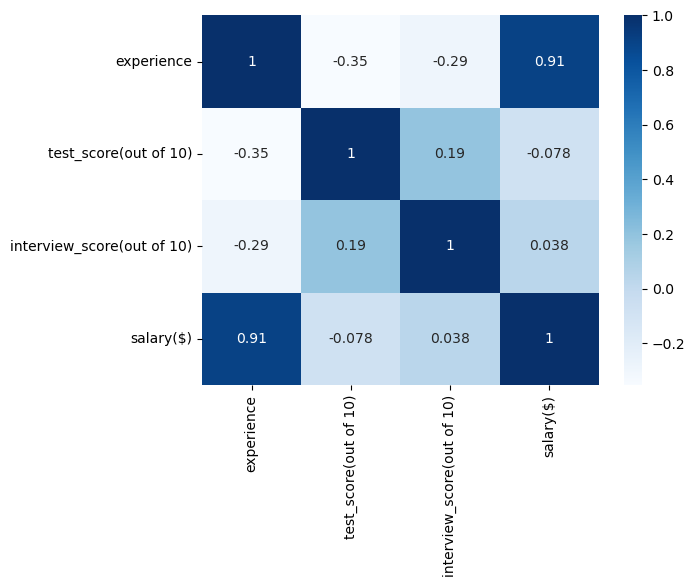

In [123]:
sns.heatmap(correlation,annot=True,cmap='Blues')

In [125]:
from sklearn.metrics import mean_squared_error

In [127]:
 mean_squared_error(y,y_pred)

2660640.9097884144

saving

In [134]:
import pickle
with open('hiring__pickle','wb') as m:
 pickle.dump(model,m)

In [138]:
with open('hiring__pickle','rb') as n:
    loaded_hiring=pickle.load(n)
    

In [212]:
loaded_hiring.predict([[0,10,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([422894.62355847])

In [142]:
#saving-another method

In [146]:
import joblib
joblib.dump(model,'hiring__model')
joblibloaded_hiring=joblib.load('hiring__model')

In [148]:
joblibloaded_hiring.predict([[0,10,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58680.56810626])

In [150]:
loaded_hiring.predict([[2,9,6]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [216]:
joblibloaded_hiring.predict([[12,10,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

In [218]:
joblibloaded_hiring.predict([[2,9,6]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])